In [ ]:
  # number of looks needed:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


In [ ]:
# x is pixel values, y is labels
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()
print("xTrain Shape: ", xTrain.shape)
print("yTrain Shape: ", yTrain.shape)
print("xTest Shape: ", xTest.shape)
print("yTest Shape: ", yTest.shape)
print(xTrain.shape[0], " training images with resolution: ", xTrain.shape[1],"x",xTrain.shape[2])
print(xTest.shape[0], " test images with resolution: ", xTest.shape[1],"x",xTest.shape[2])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
xTrain Shape:  (60000, 28, 28)
yTrain Shape:  (60000,)
xTest Shape:  (10000, 28, 28)
yTest Shape:  (10000,)
60000  training images with resolution:  28 x 28
10000  test images with resolution:  28 x 28


Example first 10 numbers


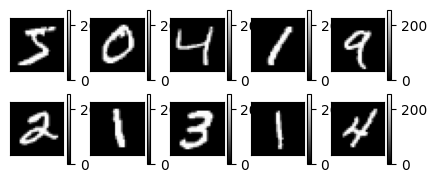

In [ ]:
print("Example first 10 numbers")
plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xTrain[i], cmap='gray')
  plt.colorbar()

In [ ]:
print()
(xTrain, xTest) = (xTrain.astype('float32')/255.0, xTest.astype('float32')/255.0)
print(type(xTrain[0,0,0]))
xTrain.shape


<class 'numpy.float32'>


(60000, 28, 28)

xTrain and xTest must be expanded because this is a CNN. Conv2D requires a 3 dimensional input because it can receive batches of n images. In this case, it receives individual images where n=1.

In [ ]:
xTrain = np.expand_dims(xTrain, -1)
xTrain.shape

(60000, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)), #reason the input is 28,28,1 is because conv2d expects a batch of images but we are feeding 1 at a time
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax"),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# This converts the labels 0-9 to 1/0 encoded labels
# aka 5 converts to [0,0,0,0,0,1,0,0,0,0]
# This increases the rank of the matrix by one (expands dimension)
#   Size of the newest dimension = highest integer of previous
#
# However, the default yTrain and yTest can be used with sparse categorical. Categorical just seems to be used in many examples.
print("yTrain Before: ", yTrain[:10])
print(yTrain.shape)
yTrainCat = keras.utils.to_categorical(yTrain, 10)
yTestCat = keras.utils.to_categorical(yTest, 10)
print("Used keras.utils.to_categorical")
print("yTrainCat after: ", yTrainCat[:10])
print(yTrainCat.shape)

yTrain Before:  [5 0 4 1 9 2 1 3 1 4]
(60000,)
Used keras.utils.to_categorical
yTrainCat after:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 10)


In [ ]:
batch_size = 128
epochs = 4

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(xTrain, yTrainCat, epochs=epochs, validation_split=0.1)
# Default batch size is 32, which is why there are 1688 per epoch with no specification (54016/32)
# It would be 422 per epoch if batch size set to 128
# Batch size: How often the algorithm recaculates a gradient
  # The gradient calculated is the changes to each weight that minimizes error
# There are 1688*32 images trained per epoch, therefore 54016 total (actually there's 54k and 16 left out)

# Validation split: Split off a portion of the training dataset to be used for validation.
  # With validation_split=0.1 the 60k images are separated to 54k training and 6k validation


Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.8741 - loss: 0.4154 - val_accuracy: 0.9823 - val_loss: 0.0600
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9779 - loss: 0.0751 - val_accuracy: 0.9873 - val_loss: 0.0447
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9883 - val_loss: 0.0388
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9849 - loss: 0.0456 - val_accuracy: 0.9902 - val_loss: 0.0351


Numbers 5628-5638


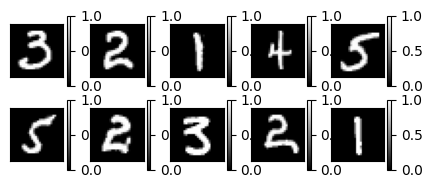

In [ ]:
# Alternate code
print("Images for 5628-5638")
plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xTest[5628+i], cmap='gray')
  plt.colorbar()

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
logitvals = probability_model(xTest[5628:5638])
logitvals

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0.08533686, 0.08533686, 0.08533695, 0.23196737, 0.08533686,
        0.08533753, 0.08533686, 0.08533691, 0.08533686, 0.08533689],
       [0.08533683, 0.08533683, 0.23196805, 0.08533697, 0.08533683,
        0.08533683, 0.08533683, 0.08533683, 0.08533724, 0.08533683],
       [0.08535535, 0.23167516, 0.08535757, 0.0853557 , 0.08536337,
        0.08535635, 0.08535532, 0.0854306 , 0.08536626, 0.08538418],
       [0.08535278, 0.0853563 , 0.08535321, 0.08535283, 0.23171541,
        0.08535337, 0.08535463, 0.08543672, 0.08537176, 0.08535293],
       [0.08533684, 0.08533684, 0.08533684, 0.08533707, 0.08533684,
        0.23196776, 0.08533684, 0.08533684, 0.08533686, 0.0853373 ],
       [0.08533688, 0.08533688, 0.08533688, 0.08533689, 0.08533688,
        0.23196727, 0.08533689, 0.08533688, 0.08533769, 0.08533693],
       [0.08611206, 0.08609767, 0.21947877, 0.08741757, 0.08609767,
        0.08609785, 0.08609775, 0.08609882, 0.0903667 , 0.08

In [ ]:
predictions=[]
for i in range(0,9):
  predictions[i] = tf.argmax(logitvals[i])

IndexError: list assignment index out of range

In [ ]:
tf.argmax(logitvals[9])

<tf.Tensor: shape=(), dtype=int64, numpy=1>